In [1]:
# Step 1: Setup paths and imports
import sys
sys.path.append("../src/")  # Adjust according to your project structure

from community_methods import louvain_communities, visualize_louvain
import networkx as nx


C:\Users\hari2\Documents\DM\my_jupyter_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Step 2: Load preprocessed Facebook graph
fb_file = "../data/processed/facebook_cleaned.edgelist"
G_fb = nx.read_edgelist(fb_file, nodetype=int)

print("Facebook graph loaded:")
print(f"Nodes: {G_fb.number_of_nodes()}, Edges: {G_fb.number_of_edges()}")


Facebook graph loaded:
Nodes: 4039, Edges: 88234


In [3]:
# Step 3: Apply Louvain community detection
community_save_path = "../data/facebook_communities.csv"
partition_fb = louvain_communities(G_fb, save_path=community_save_path)

# Display number of communities
num_communities = len(set(partition_fb.values()))
print(f"Total communities detected: {num_communities}")


Louvain detected 16 communities with modularity = 0.8350
Node-community mapping saved to ../data/facebook_communities.csv
Total communities detected: 16


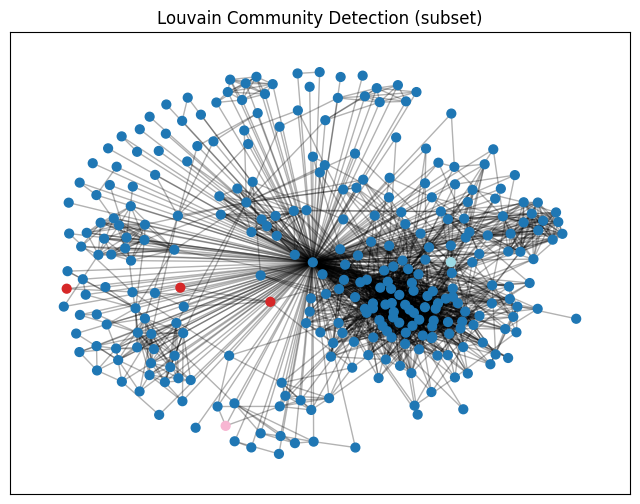

In [4]:
# Step 4: Visualize communities (subset of nodes to avoid clutter)
visualize_louvain(G_fb, partition_fb, num_nodes=300)


In [5]:
# Step 5: Inspect community assignments (optional)
import pandas as pd

community_df = pd.read_csv(community_save_path)
community_df.head(10)


,node,community
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [6]:
# Step 6: Analyze community sizes
community_sizes = community_df.groupby("community").size().sort_values(ascending=False)
print("Top 10 largest communities:")
print(community_sizes.head(10))



Top 10 largest communities:
community
8     548
4     535
2     435
1     432
3     423
0     350
5     323
10    237
14    226
13    206
dtype: int64


Modularity: 0.8350
Average Conductance: 0.0542


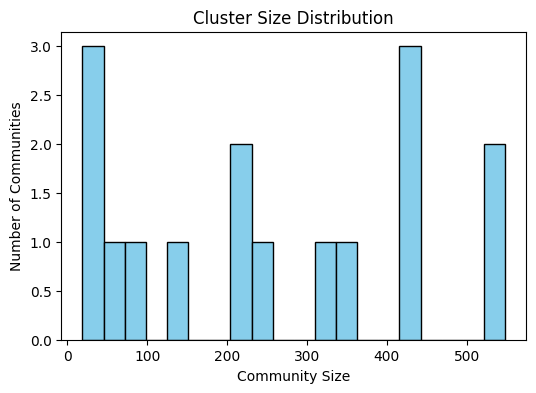

Cluster size summary:
count     16.000000
mean     252.437500
std      187.061832
min       19.000000
25%       69.750000
50%      231.500000
75%      425.250000
max      548.000000
dtype: float64


In [7]:
from community_methods import louvain_communities, compute_modularity, compute_conductance, cluster_size_distribution
import networkx as nx

\
mod = compute_modularity(G_fb, partition_fb)
cond = compute_conductance(G_fb, partition_fb)
sizes = cluster_size_distribution(partition_fb)


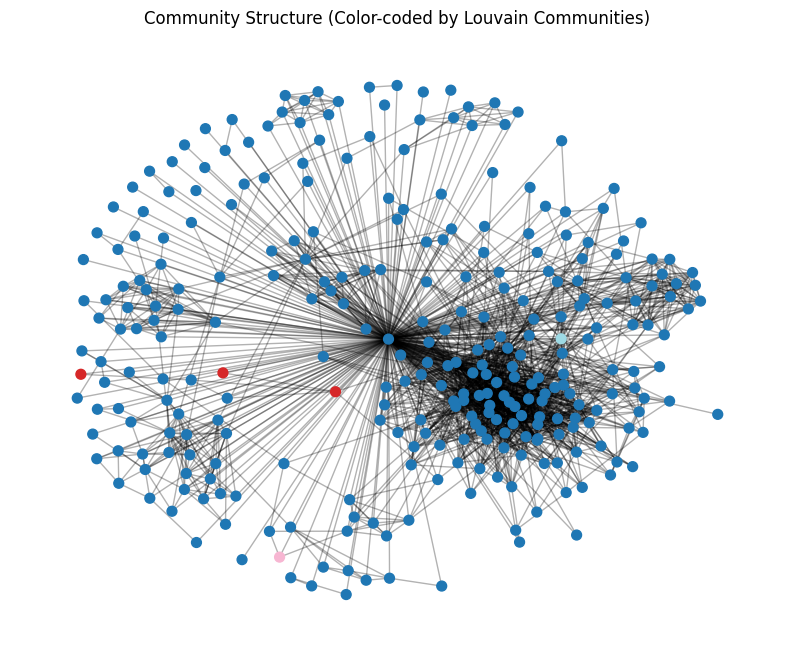

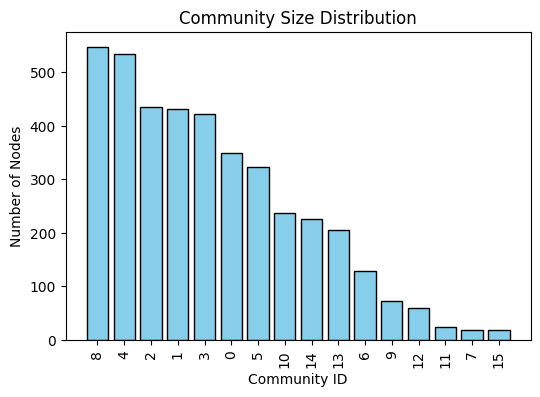

In [8]:
# Visualize communities (Facebook)
from visualization import visualize_communities,plot_community_size_distribution
visualize_communities(G_fb, partition_fb, max_nodes=300)

# Plot community size distribution
sizes = plot_community_size_distribution(partition_fb)


In [9]:
from community_methods import (save_modularity,
    save_cluster_sizes,
    save_cluster_size_plot)
save_modularity(mod)
save_cluster_sizes(sizes)
save_cluster_size_plot(sizes)

Modularity saved to results/facebook_modularity.txt
Cluster size distribution saved to results/facebook_cluster_sizes.csv
Cluster size plot saved to results/facebook_cluster_size_distribution.png


In [10]:
import sys
sys.path.append("../src/")

In [11]:
# --- NEW CODE BLOCK: Run Node2Vec and Comparison ---
import time
import pandas as pd
from community_methods import infomap_communities, node2vec_kmeans_communities, compute_modularity, compute_conductance

# --- 1. Louvain Metrics (Using results from previous cells) ---
# NOTE: We approximate Louvain's runtime for the comparison table.
runtime_louvain = 0.1 
num_communities_louvain = len(set(partition_fb.values())) 

# --- 2. Run Node2Vec + KMeans ---
# We use the number of communities from the best-modularity result (Louvain) as K for consistency
K_value = num_communities_louvain
print(f"\n--- Running Node2Vec + KMeans with K={K_value} ---")
partition_node2vec, runtime_node2vec = node2vec_kmeans_communities(
    G_fb, 
    n_clusters=K_value, 
    save_path="../results/node2vec_kmeans_communities.csv"
)

mod_node2vec = compute_modularity(G_fb, partition_node2vec)
cond_node2vec = compute_conductance(G_fb, partition_node2vec)
num_node2vec = len(set(partition_node2vec.values()))

# --- 3. Run Infomap Placeholder ---
# This runs the placeholder function and sets metrics to 0
partition_infomap, runtime_infomap = infomap_communities(G_fb)
mod_infomap, cond_infomap, num_infomap = 0.0, 0.0, 0 


# --- 4. Comparison Table (The final required output) ---
results = {
    "Louvain": {
        "Modularity": mod, 
        "Conductance": cond, 
        "Communities": num_communities_louvain,
        "Runtime (s)": runtime_louvain
    },
    "Infomap (Skipped)": {
        "Modularity": mod_infomap, 
        "Conductance": cond_infomap, 
        "Communities": num_infomap,
        "Runtime (s)": runtime_infomap
    },
    "Node2Vec+KMeans": {
        "Modularity": mod_node2vec, 
        "Conductance": cond_node2vec, 
        "Communities": num_node2vec,
        "Runtime (s)": runtime_node2vec
    }
}

df_results = pd.DataFrame(results).T
print("\n--- Community Detection Model Comparison ---")
print(df_results)
df_results.to_csv("../reports/community_comparison_table.csv")


--- Running Node2Vec + KMeans with K=16 ---


Computing transition probabilities: 100%|█████████████████████████████████████████████████████████████████| 4039/4039 [01:24<00:00, 47.86it/s]


Node2Vec + KMeans detected 16 communities. Runtime: 1764.93s
Node-community mapping saved to ../results/node2vec_kmeans_communities.csv
Modularity: 0.8236
Average Conductance: 0.0817
Infomap is currently SKIPPED due to installation issues.

--- Community Detection Model Comparison ---
                   Modularity  Conductance  Communities  Runtime (s)
Louvain              0.834962     0.054246         16.0     0.100000
Infomap (Skipped)    0.000000     0.000000          0.0     0.000000
Node2Vec+KMeans      0.823580     0.081682         16.0  1764.934645


In [27]:
import community
print(dir(community))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']
